Consider a file mutations.tsv containing point mutations (at the nucleotide level) for the SARS-CoV-2 virus. On the right, an example file
content. The two columns are separated by a tab.

A mutation is composed as follows:

• the first character indicates the reference nucleotide, the last one indicates the mutated nucleotide:

     -when both are letters,this is a substitution(e.g.,'A29735T')
     -when the first is a dash ‘-’ and the last is a letter, this is an insertion
     -when the first is a letter and the last is a ‘-’, this is a deletion (e.g.,

• the number in the middle indicates the coordinate of the virus where the mutation occurred.

### Ex1)[pts 3]
Build a Python function read_muts that reads the tab-separated file and returns a list containing the mutations in the file.



In [7]:
from unicodedata import category

from jsonschema.benchmarks.const_vs_enum import valid


def read_muts(file:str):
    with open(file, 'r') as f:
        f.readline()
        list_mutations = []
        for line in f:
            line=line.strip().split('\t')
            list_mutations.append(line[1])

    return list_mutations

### Ex2) [pts 7]
Build a Python function syn_report taking in input a list of mutations (as returned in Ex.1) and checking the following conditions:

a. only correct nucleotides (A, C, G, or T) or a dash (indicating an insertion or a deletion) are used;

b. the central part of the string is a number;

c. the coordinate does not exceed 29903.

When (a), (b) and (c) are met, a confirmation message is printed. Else, if any of these conditions are not met, appropriate exceptions are
raised and handled (built-in exceptions or implemented from scratch).

In [28]:
class LimitError(Exception):
    pass

def syn_report(lst:list):
    truthy=[]
    for mutation in lst:
      valid=['A','C','G','T','-']

      try:
        if mutation[0] in valid and mutation[-1] in valid:
            if mutation[1:-1].isdigit():
                if int(mutation[1:-1]) <= 29903:
                    print(f'all three conditions are satisfied')
                    truthy.append(True)

                else:
                    truthy.append(False)
                    raise LimitError('the coordinate must not exceed 29903')
            else:
                truthy.append(False)
                raise TypeError('Only numbers are allowed as coordinate')
        else:
            truthy.append(False)
            raise ValueError(f'only {valid} are valid')

      except ValueError as e:
         print(e)
      except TypeError as e:
         print(e)
      except LimitError as e:
         print(e)
      #else:
         #print(f'all three conditions are satisfied')

    return truthy

ls=['A29735T','-29735A','A29735-','-29035G']
syn_report(ls)

all three conditions are satisfied
all three conditions are satisfied
all three conditions are satisfied
all three conditions are satisfied


[True, True, True, True]

 ### Ex4) [pts 6]
Build a Python function dictionarize taking in input a list of mutations (as returned in Ex.1; here, you can assume that they are all formatted
 correctly) and memorizing them in a dictionary, whose keys are the actual mutations and values are smaller dictionaries. For instance, one
 item of the upper dictionary may become:

         `“G29736-”: {“type”: “deletion”, “coordinate”: 29736, “ref”: G, “alt”: “-”} `

Hint: for determining the type, it may be convenient to use an auxiliary function.


In [46]:
def check(mutation:str):
    if mutation[0]=='-':
        return 'insertion'
    elif mutation[-1]=='-':
        return 'deletion'
    else:
        return 'substitution'


def dictionarize(lst:list):
    diction={mut:{'type': check(mut) , 'coordinate':int(mut[1:-1]), 'ref':mut[0], 'alt': mut[-1] } for mut in lst}
    return diction

#Test
m=['G29736-']
dictionarize(m)=={'G29736-': {'type': 'deletion', 'coordinate': 29736, 'ref': 'G', 'alt': '-'}}
dictionarize(ls)


{'A29735T': {'type': 'substitution',
  'coordinate': 29735,
  'ref': 'A',
  'alt': 'T'},
 '-29735A': {'type': 'insertion', 'coordinate': 29735, 'ref': '-', 'alt': 'A'},
 'A29735-': {'type': 'deletion', 'coordinate': 29735, 'ref': 'A', 'alt': '-'},
 '-29035G': {'type': 'insertion', 'coordinate': 29035, 'ref': '-', 'alt': 'G'}}

### Ex5) [pts 4]
Build a Python function bar_types taking the dictionary as created in Ex.4 in input and drawing a bar plot counting the occurrences of three
categories of mutations: substitutions, insertions, and deletions.

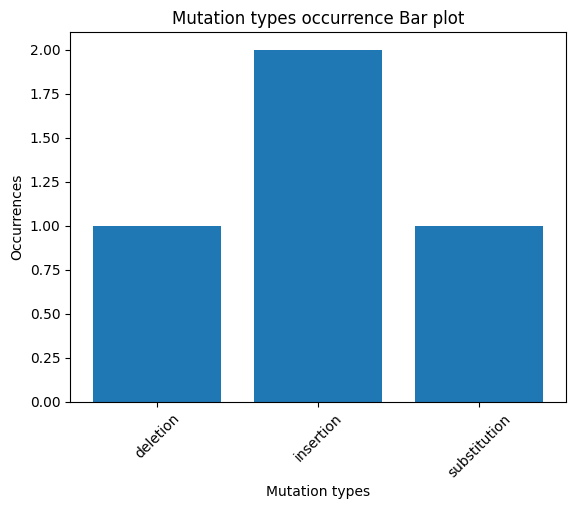

In [52]:
import matplotlib.pyplot as plt

def bar_types(diction:dict):
    types=[vl['type'] for vl in diction.values()]
    category=['deletion', 'insertion', 'substitution']
    count=[ types.count('deletion'), types.count('insertion'), types.count('substitution') ]

    plt.bar(category, count)
    plt.xticks(category, rotation=45)
    plt.title('Mutation types occurrence Bar plot')
    plt.xlabel('Mutation types')
    plt.ylabel('Occurrences')
    plt.show()

a=dictionarize(ls)
bar_types(a)

### Ex6)[pts 7]
Build the basic infrastructure for describing the content in the file with classes. Implement a Mutation class and a Sequence class, which has
 a list of Mutations. This attribute must be filled using an appropriate setter method, which checks that mutations are of the correct data
 type. Else, they are not memorized.
Then, instantiate basic objects to show the usage of your classes. E.g., SeqA and SeqB both have C25000T and A28271T, but only SeqB has C25584T.
Finally, implement a method to print the list of mutations of a sequence.
Hint: mutations are complex objects, so they must implement their own method to be printed as strings.

In [83]:
class Mutation:
    def __init__(self,mut):
        valid=['A','C','G','T','-']
        if mut[0] in valid and mut[-1] in valid:
            if mut[1:-1].isdigit():
                if int(mut[1:-1]) <= 29903:
                    self.mut=mut

    def __str__(self):
        return str (self.mut)

class Sequence:
    def __init__(self):
        self.mutations=[]

    def __iter__(self):
        return iter(self.mutations)

    def set_mut(self,*mutations):
      for mut in mutations:
        if isinstance(mut, Mutation):
            self.mutations.append(mut)
        else:  #totaly avoidable
            print(f'mutation {mut} is not memorized')

    def __str__(self):
        return '\n'.join([str(mut) for mut in self.mutations])

    def print(self):
        print([str(mut) for mut in self.mutations])


C25000T=Mutation('C25000T')
A28271T=Mutation('A28271T')
C25584T=Mutation('C25584T')

seqA=Sequence()
seqA.set_mut(C25584T, A28271T)
seqB=Sequence()
seqB.set_mut(C25584T,A28271T, C25000T)
seqB.print()
print(seqB)

['C25584T', 'A28271T', 'C25000T']
C25584T
A28271T
C25000T
